In [1]:
# 3/27/2024
# CSC461 – Assignment2 – Graphs & maps
# ALI SHAKEEL
# FA21-BSE-099
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#import Google Drive and mount the entire drive

from google.colab import drive
drive.mount('/content/drive')
#load the dataset (csv file) into the Pandas dataframe

df_population = pd.read_csv('/content/drive/My Drive/DS-Datasets/world_pop.csv')

Mounted at /content/drive


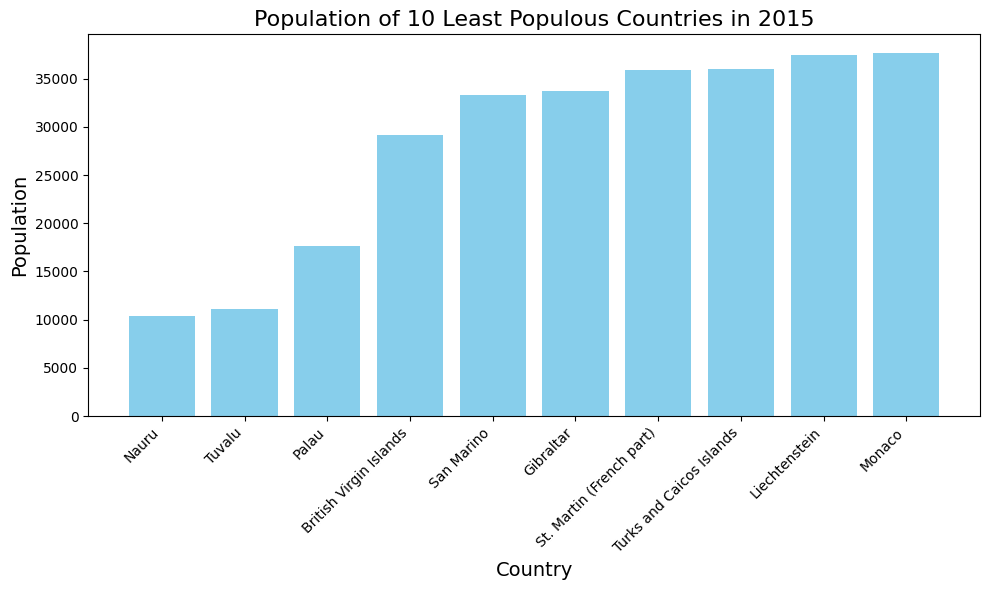

In [5]:
# Task 1: Show the population of 10 least populous countries in 2015 using a chart
data_2015 = df_population[df_population['year_2015'].notnull()]
least_populous_2015 = data_2015.nsmallest(10, 'year_2015')

plt.figure(figsize=(10, 6))
plt.bar(least_populous_2015['country'], least_populous_2015['year_2015'], color='skyblue')
plt.title('Population of 10 Least Populous Countries in 2015', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

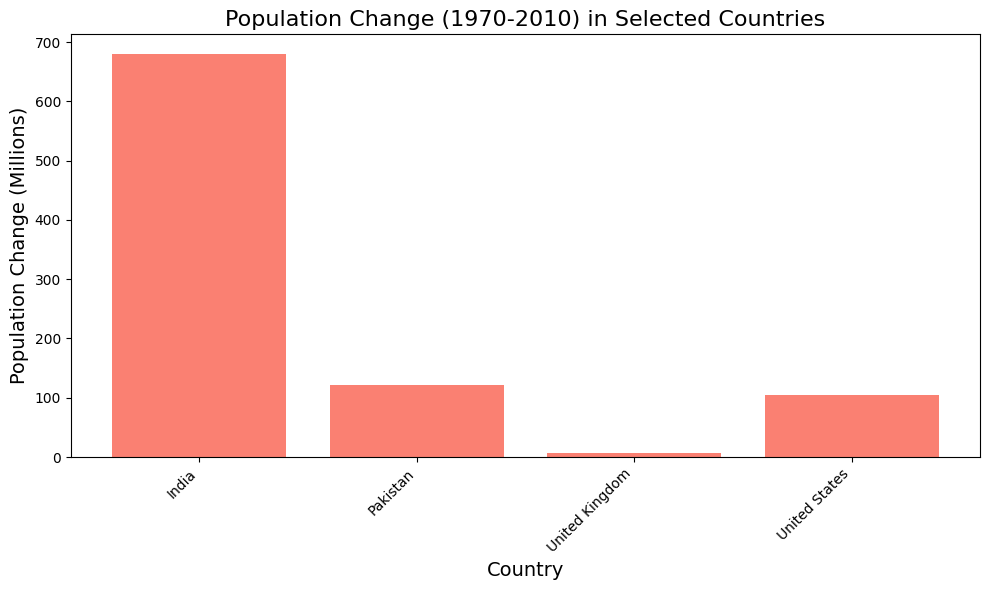

In [8]:
# Task 2: Calculate the change in population of Pakistan, India, United States, and United Kingdom from 1970 to 2010 and show the population change (in millions) using a chart
countries_of_interest = ['Pakistan', 'India', 'United States', 'United Kingdom']
data_countries = df_population[(df_population['country'].isin(countries_of_interest)) & ((df_population['year_1970'].notnull()) | (df_population['year_2010'].notnull()))]

# Melt the DataFrame to convert columns into rows
data_countries_melted = data_countries.melt(id_vars='country', value_vars=['year_1970', 'year_2010'], var_name='year', value_name='population')

# Pivot the data for easier calculation
pivot_data = data_countries_melted.pivot(index='country', columns='year', values='population')

# Calculate population change (in millions)
population_change = (pivot_data['year_2010'] - pivot_data['year_1970']) / 1e6  # Converting to millions

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(population_change.index, population_change.values, color='salmon')
plt.title('Population Change (1970-2010) in Selected Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population Change (Millions)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

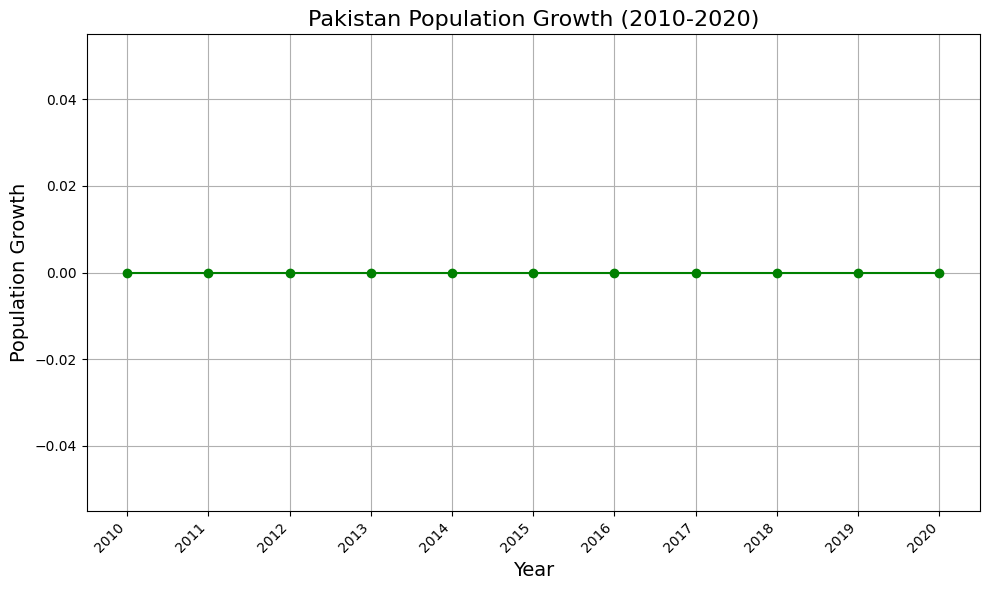

In [11]:
# task 3: Calculate the Pakistan population growth between 2010-2020 and then show the data using a chart.
data_pakistan_growth = df_population[(df_population['country'] == 'Pakistan')]


years = range(2010, 2021)
population_growth = [data_pakistan_growth[f'year_{year}'].iloc[-1] - data_pakistan_growth[f'year_{year}'].iloc[0] for year in years]


plt.figure(figsize=(10, 6))
plt.plot(years, population_growth, marker='o', color='green')
plt.title('Pakistan Population Growth (2010-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population Growth', fontsize=14)
plt.xticks(years, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()